In [1]:
# 메모리 변수 모두 제거
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

# 메모리 변수 확인
#globals()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings(action='ignore')

# 한글 폰트 사용
plt.rc('font', family='NanumGothic') # For Windows

# 그래프에서 마이너스 기호가 표시
# matplotlib.rcParams['axes.unicode_minus'] = False

In [105]:
train = pd.read_csv('train_메뉴제외.csv')
train.head()
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '중식계', '석식계', '식사가능인원', '중식결식', '석식결식', '중식강수여부', '중식기온',
       '석식강수여부', '석식기온', '확진자수'],
      dtype='object')

In [106]:
# 컬럼명이 너무 길어서 컬럼명 수정
train = train.copy()
train.columns = ['일자', '요일', '정원수', '휴가자수', '출장자수', '야근자수','재택근무자수', '중식계', '석식계', '식사가능인원', '중식결식', '석식결식', '중식강수여부', '중식기온','석식강수여부', '석식기온', '확진자수']
train.head(2)

,일자,요일,정원수,휴가자수,출장자수,야근자수,재택근무자수,중식계,석식계,식사가능인원,중식결식,석식결식,중식강수여부,중식기온,석식강수여부,석식기온,확진자수
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2163.0,1124.0,1832.0,0.0,3.0,0.0,0.9,0.0
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,2059.0,1192.0,1499.0,0.0,1.7,0.0,2.4,0.0


In [7]:
# null 값을 0으로 변경
train = train.fillna(0)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      1205 non-null   object 
 1   요일      1205 non-null   object 
 2   정원수     1205 non-null   int64  
 3   휴가자수    1205 non-null   int64  
 4   출장자수    1205 non-null   int64  
 5   야근자수    1205 non-null   int64  
 6   재택근무자수  1205 non-null   float64
 7   조식메뉴    1205 non-null   object 
 8   중식메뉴    1205 non-null   object 
 9   석식메뉴    1205 non-null   object 
 10  중식계     1205 non-null   float64
 11  석식계     1205 non-null   float64
 12  식사가능인원  1205 non-null   float64
 13  중식결식    1205 non-null   float64
 14  석식결식    1205 non-null   float64
 15  연       1205 non-null   int64  
 16  월       1205 non-null   int64  
 17  일       1205 non-null   int64  
 18  중식강수여부  1205 non-null   float64
 19  석식강수여부  1205 non-null   float64
 20  일별확진자수  1205 non-null   float64
dtypes: float64(9), int64(7), object(5)
me

### 요일

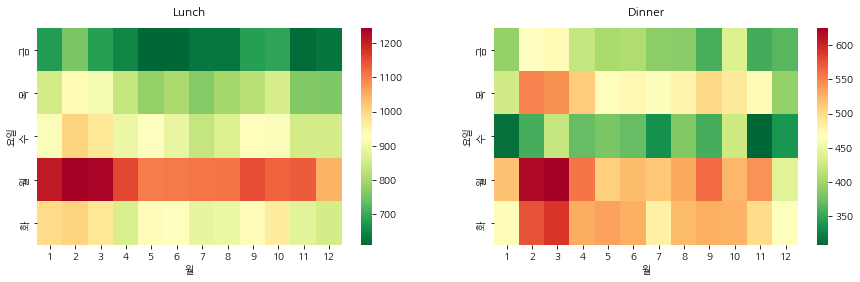

In [9]:
tmp_ln = train.groupby(['요일', '월'])['중식계'].mean().reset_index().pivot('요일', '월', '중식계')
tmp_dn = train.groupby(['요일', '월'])['석식계'].mean().reset_index().pivot('요일', '월', '석식계')

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))

sns.heatmap(tmp_ln, cmap='RdYlGn_r', ax=ax[0])
ax[0].set_title('Lunch', pad = 12)
sns.heatmap(tmp_dn, cmap='RdYlGn_r', ax=ax[1])
ax[1].set_title('Dinner', pad = 12)

plt.show()

=============정원수별 중식계==============


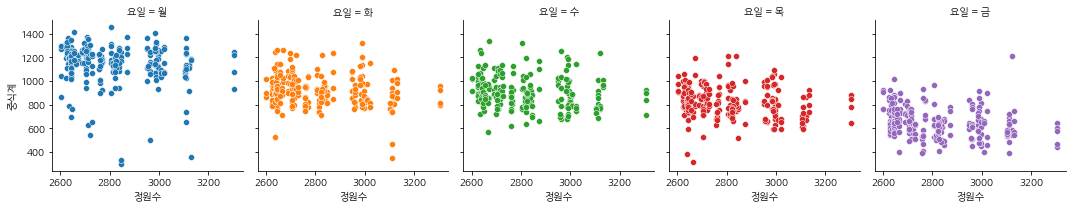

=============정원수별 석식계==============


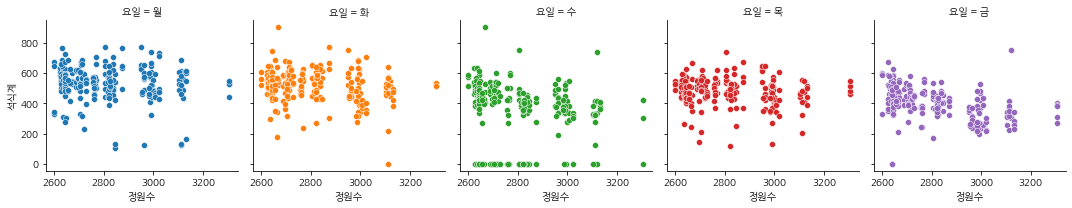

=============휴가자수별 중식계==============


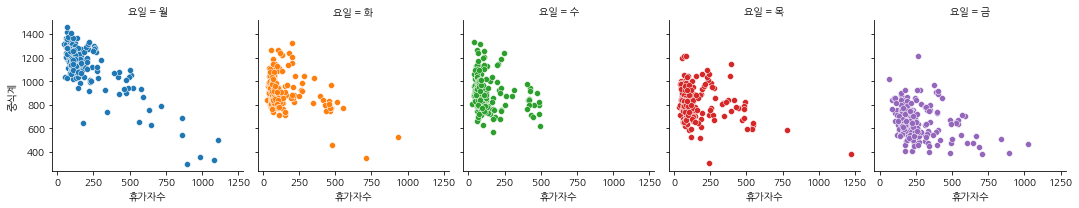

=============휴가자수별 석식계==============


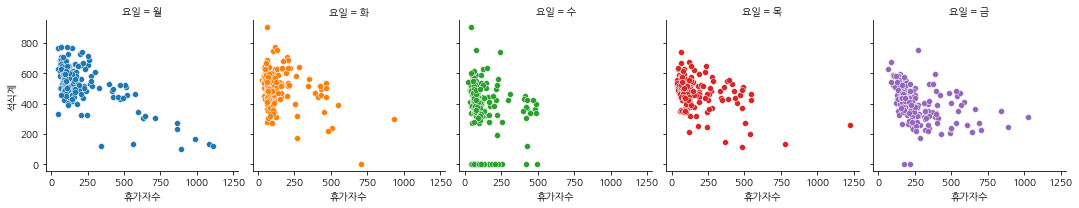

=============출장자수별 중식계==============


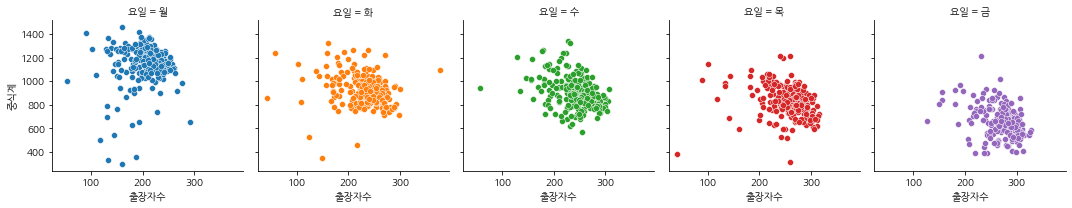

=============출장자수별 석식계==============


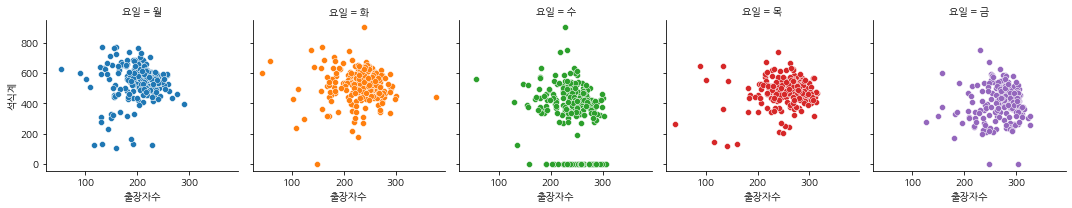

=============야근자수별 중식계==============


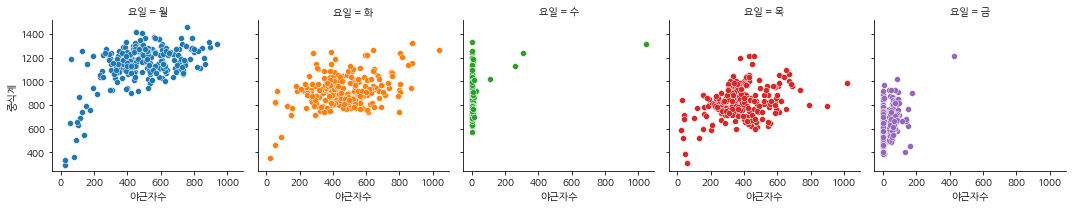

=============야근자수별 석식계==============


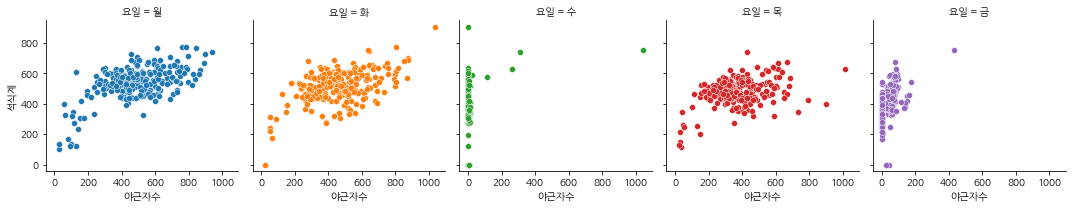

In [22]:
for column in train.columns[2:6]:
    print(f'============={column}별 중식계==============')
    grid = sns.FacetGrid(data=train, col='요일', hue = '요일')
    grid.map(sns.scatterplot, column, '중식계')
    plt.show()
    
    print(f'============={column}별 석식계==============')
    grid = sns.FacetGrid(data=train, col='요일', hue = '요일')
    grid.map(sns.scatterplot, column, '석식계')
    plt.show()

### 강수 여부

In [40]:
print(train['중식강수여부'].value_counts())
print(train['석식강수여부'].value_counts())

0.0    1121
1.0      84
Name: 중식강수여부, dtype: int64
0.0    1138
1.0      67
Name: 석식강수여부, dtype: int64


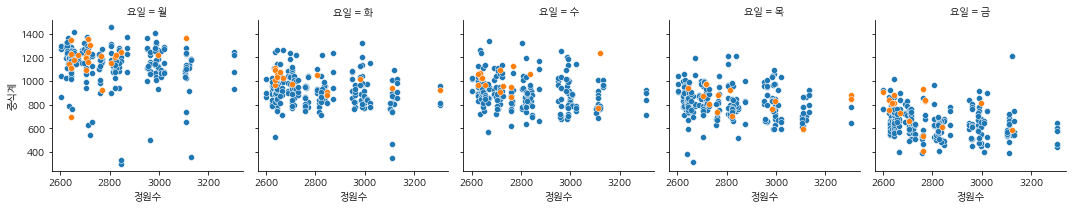

In [38]:
grid = sns.FacetGrid(data=train, col='요일', hue = '중식강수여부')
grid.map(sns.scatterplot, '정원수', '중식계')
plt.show()
grid = sns.FacetGrid(data=train, col='요일', hue = '석식강수여부')
grid.map(sns.scatterplot, '정원수', '석식계')
plt.show()

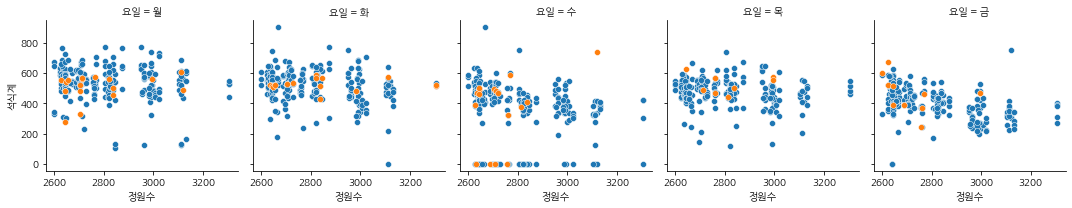

In [39]:
grid = sns.FacetGrid(data=train, col='요일', hue = '석식강수여부')
grid.map(sns.scatterplot, '정원수', '석식계')
plt.show()

## 일별 확진자수

### 코로나가 있을때 없을때의 차이가 있는지 확인

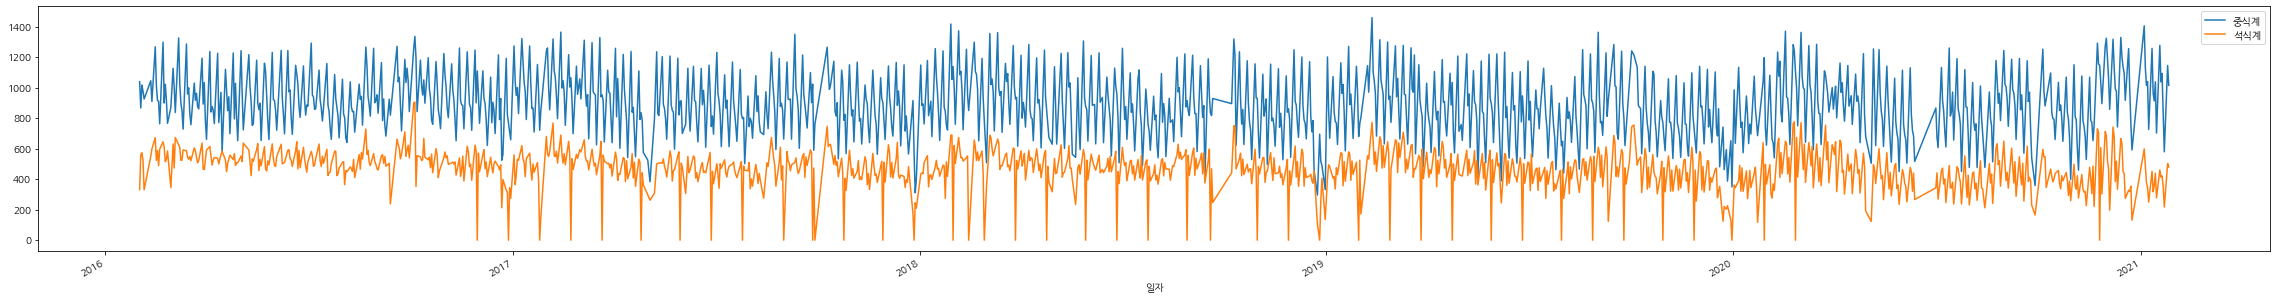

In [387]:
train.plot(x = '일자', y = ['중식계', '석식계'], figsize = (40, 5))
plt.show()

In [107]:
train['확진자수'].value_counts()

0.0      984
39.0       4
27.0       4
125.0      4
45.0       3
        ... 
581.0      1
838.0      1
389.0      1
511.0      1
449.0      1
Name: 확진자수, Length: 162, dtype: int64

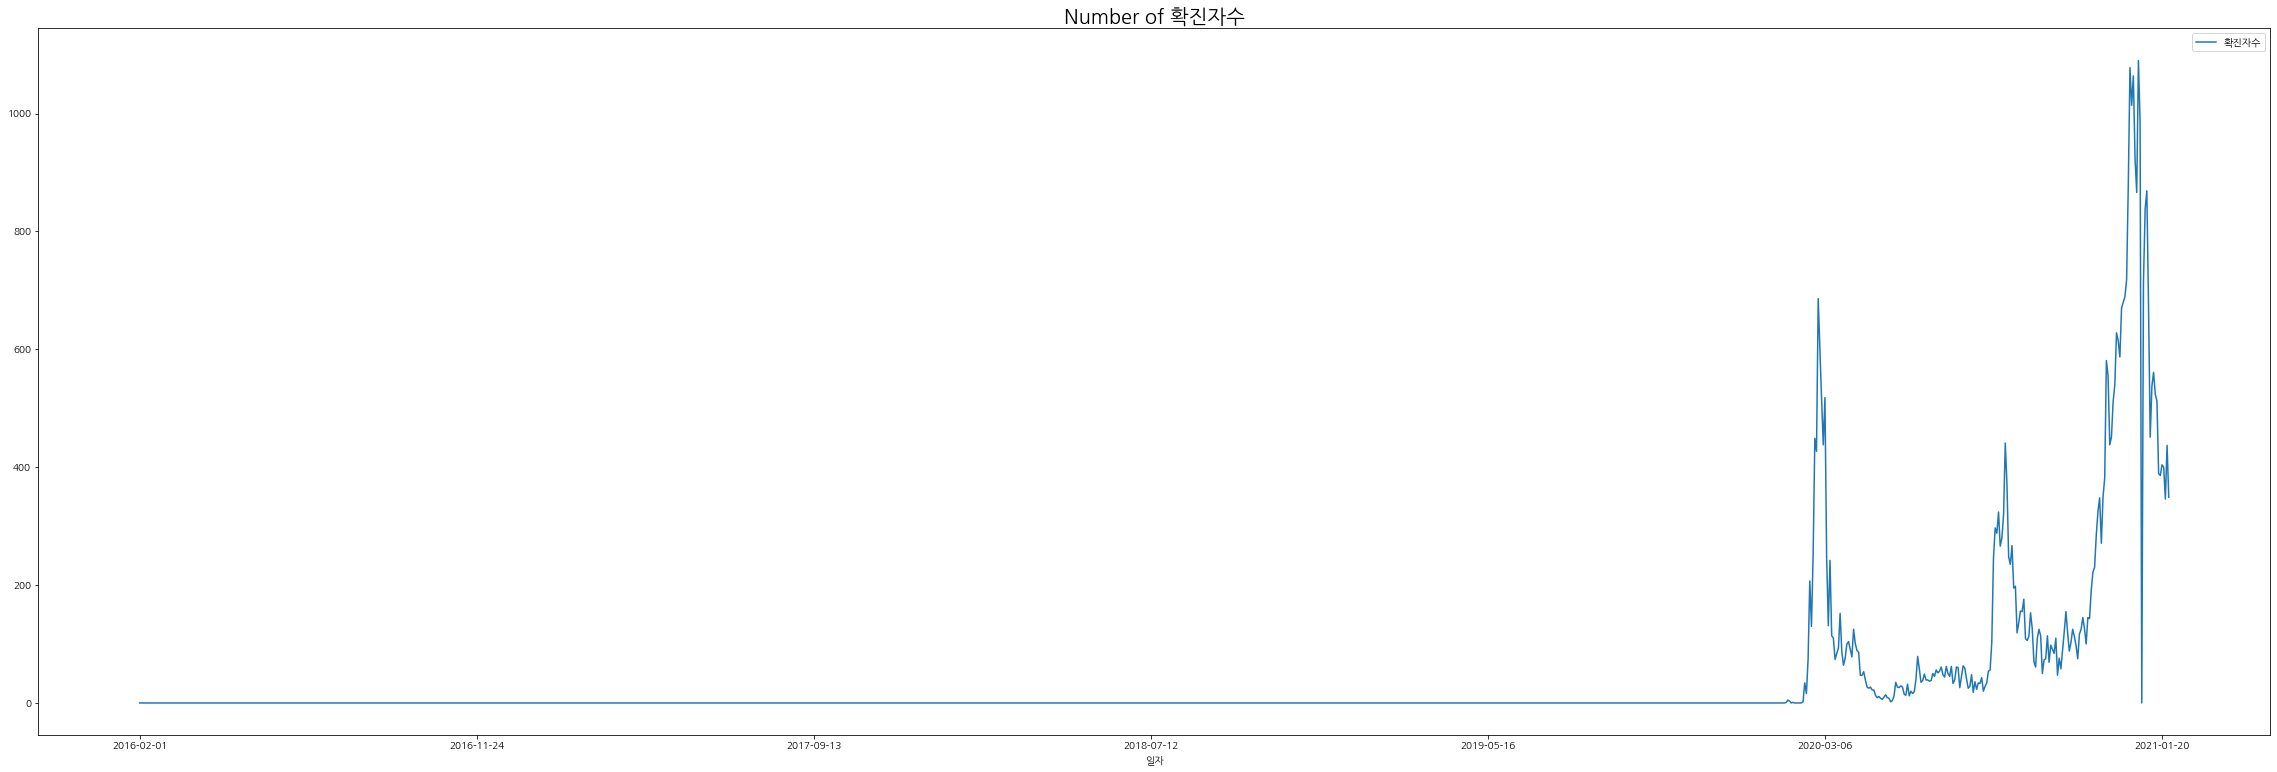

In [108]:
train.plot(x='일자', y='확진자수', figsize=(40, 13))
plt.title( f'Number of 확진자수', fontsize = 20)
plt.show()

In [109]:
# null data 찾아서 입력
train[train['일자']=='2021-01-04']['확진자수'] = 985

In [397]:
train[train['확진자수']==0].sort_values('일자', ascending=False).head(10)

,일자,요일,정원수,휴가자수,출장자수,야근자수,재택근무자수,중식계,석식계,식사가능인원,...,석식결식,중식강수여부,중식기온,석식강수여부,석식기온,확진자수,corona,월,년,전날확진자수
1188,2021-01-04,월,2983,92,91,490,340.0,1405.0,598.0,1970.0,...,1372.0,0.0,2.7,0.0,1.3,0.0,yes,1,2021,985.0
986,2020-02-17,월,2872,74,196,722,0.0,1370.0,649.0,1880.0,...,1231.0,0.0,1.8,0.0,-0.5,0.0,yes,2,2020,0.0
985,2020-02-14,금,2872,160,273,0,0.0,776.0,436.0,2439.0,...,2003.0,0.0,14.3,0.0,14.2,0.0,yes,2,2020,0.0
984,2020-02-13,목,2872,71,249,620,0.0,834.0,575.0,1932.0,...,1357.0,0.0,13.4,0.0,12.6,0.0,yes,2,2020,0.0
983,2020-02-12,수,2872,65,210,5,0.0,1173.0,411.0,2592.0,...,2181.0,1.0,8.5,1.0,10.2,0.0,yes,2,2020,0.0
982,2020-02-11,화,2872,52,198,748,0.0,1075.0,668.0,1874.0,...,1206.0,0.0,10.4,0.0,11.3,0.0,yes,2,2020,1.0
980,2020-02-07,금,2872,140,247,2,0.0,539.0,326.0,2483.0,...,2157.0,0.0,6.1,0.0,7.3,0.0,yes,2,2020,3.0
976,2020-02-03,월,2872,101,208,537,1.0,1081.0,495.0,2025.0,...,1530.0,0.0,7.4,0.0,6.1,0.0,no,2,2020,0.0
975,2020-01-31,금,2821,183,265,0,0.0,623.0,368.0,2373.0,...,2005.0,0.0,7.6,0.0,7.0,0.0,no,1,2020,0.0
974,2020-01-30,목,2821,76,261,482,0.0,736.0,497.0,2002.0,...,1505.0,0.0,8.6,0.0,8.1,0.0,no,1,2020,0.0


In [116]:
# 확진자수 최초 발생일인 2020.02.04일을 기준으로 이전, 이후의 식사인원의 차이가 있는지 확인
train['corona'] = train['일자'].apply(lambda x: 'no' if x < '2020-02-04' else 'yes' )
train['corona'].value_counts()

no     977
yes    228
Name: corona, dtype: int64

=============정원수별 중식계(hue=corona)==============


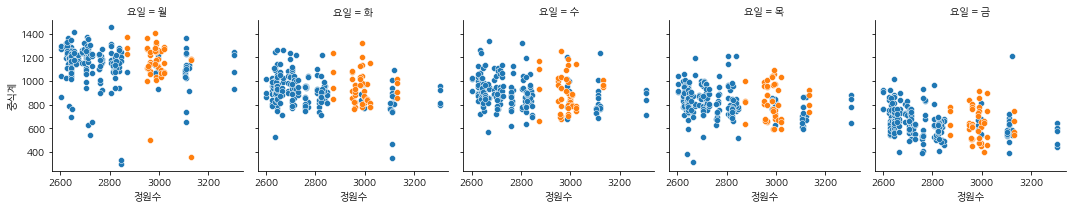

=============정원수별 석식계(hue=corona)==============


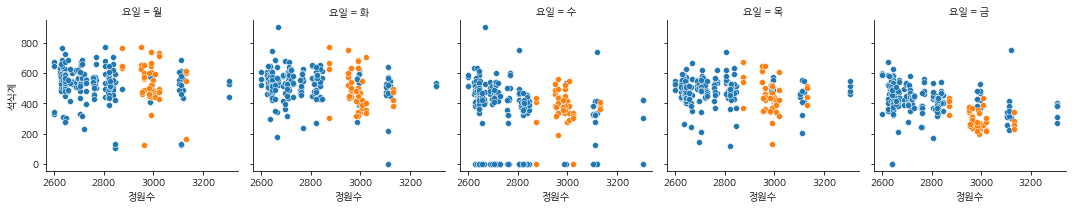

In [350]:
for pop in ['중식계', '석식계']:
    print(f'=============정원수별 {pop}(hue=corona)==============')
    grid = sns.FacetGrid(data=train, col='요일', hue = 'corona')
    grid.map(sns.scatterplot, '정원수', pop)
    plt.show()

=============식사가능인원별 중식계(hue=corona)==============


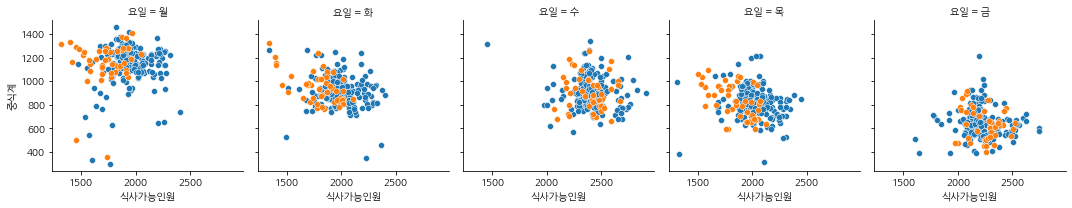

=============식사가능인원별 석식계(hue=corona)==============


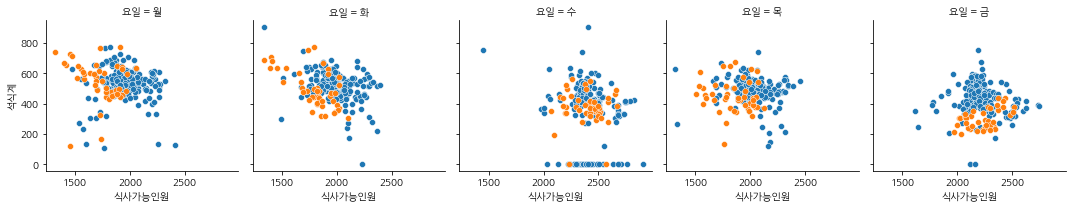

In [130]:
for pop in ['중식계', '석식계']:
    print(f'=============식사가능인원별 {pop}(hue=corona)==============')
    grid = sns.FacetGrid(data=train, col='요일', hue = 'corona')
    grid.map(sns.scatterplot, '식사가능인원', pop)
    plt.show()

=============재택근무자수별 중식계(hue=corona)==============


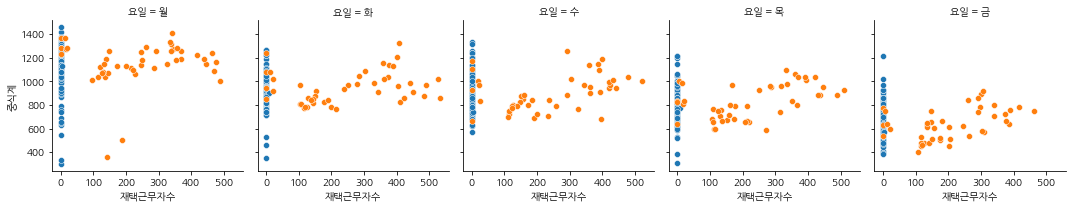

=============재택근무자수별 석식계(hue=corona)==============


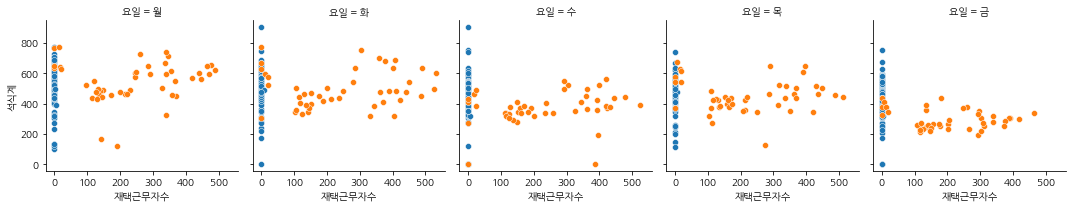

In [128]:
for pop in ['중식계', '석식계']:
    print(f'=============재택근무자수별 {pop}(hue=corona)==============')
    grid = sns.FacetGrid(data=train, col='요일', hue = 'corona')
    grid.map(sns.scatterplot, '재택근무자수', pop)
    plt.show()

In [405]:
print('코로나x 중식수 비율:', np.mean(train[train['corona']=='no']['중식계'])/np.mean(train[train['corona']=='no']['식사가능인원']))
print('코로나o 중식수 비율:', np.mean(train[train['corona']=='yes']['중식계'])/np.mean(train[train['corona']=='yes']['식사가능인원']))
print()
print('코로나x 석식수 비율:',np.mean(train[train['corona']=='no']['석식계'])/np.mean(train[train['corona']=='no']['식사가능인원']))
print('코로나o 석식수 비율:',np.mean(train[train['corona']=='yes']['석식계'])/np.mean(train[train['corona']=='yes']['정원수']))

코로나x 중식계: 0.32145128935533895
코로나o 중식계: 0.2997910490278567

코로나x 석식계: 0.16938406903204822
코로나o 석식계: 0.14491917283020642


- 해가 지날수록 정원수는 늘지만, 식수에는 차이가 없다.
- 단 금요일 석식은 조금 영향을 주는것 같다.

<<<<<<< 년 >>>>>>>
=============재택근무자수별 중식계(hue=corona)==============


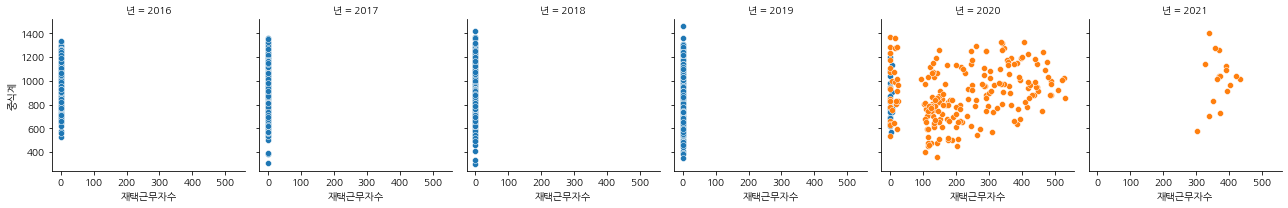

<<<<<<< 년 >>>>>>>
=============재택근무자수별 석식계(hue=corona)==============


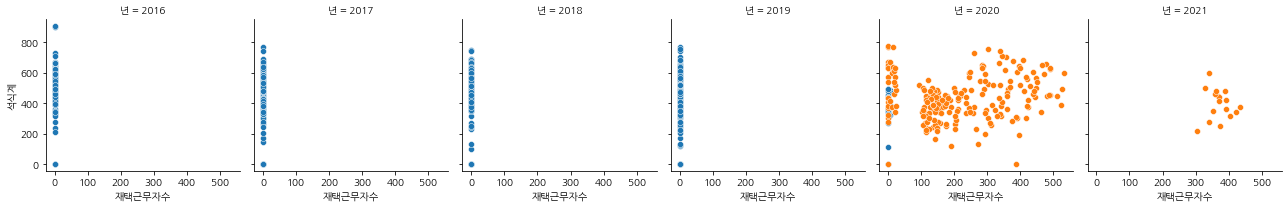

<<<<<<< 월 >>>>>>>
=============재택근무자수별 중식계(hue=corona)==============


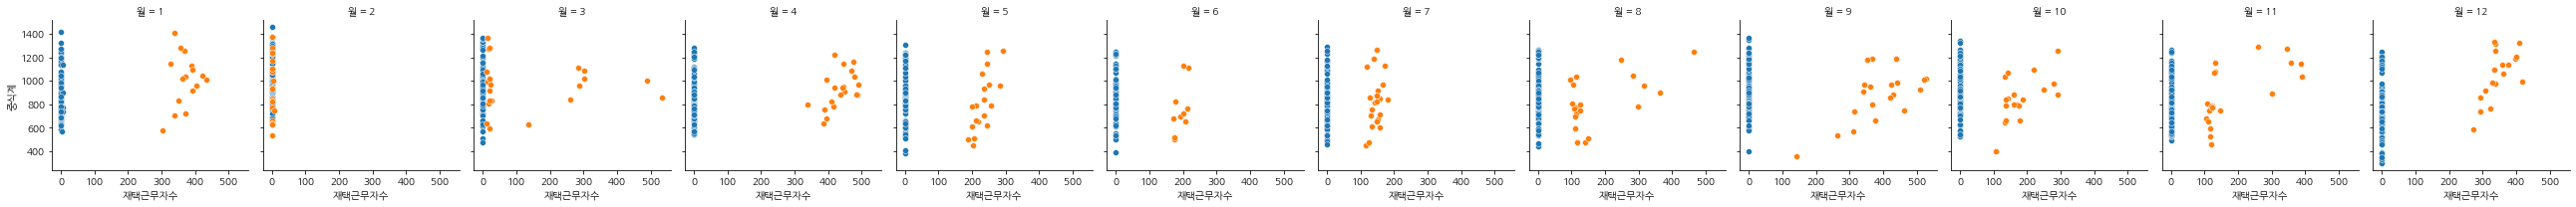

<<<<<<< 월 >>>>>>>
=============재택근무자수별 석식계(hue=corona)==============


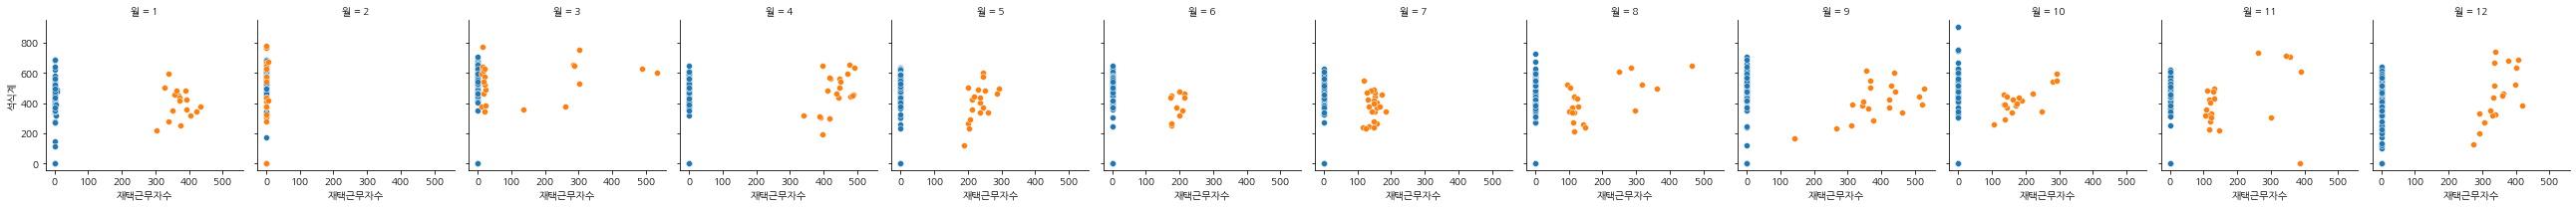

In [365]:
# 월, 년 데이터 추가
train['일자'] = pd.to_datetime(train['일자'])
train['월'] = train['일자'].dt.month
train['년'] = train['일자'].dt.year

for i in ['년', '월']:
    for pop in ['중식계', '석식계']:
        print(f'<<<<<<< {i} >>>>>>>')
        print(f'=============재택근무자수별 {pop}(hue=corona)==============')
        grid = sns.FacetGrid(data=train, col=i, hue = 'corona')
        grid.map(sns.scatterplot, '재택근무자수', pop)
        plt.show()

- 2, 3월은 바쁜달.. 코로나가 터져도 재택을 하지 않지.. 
- 연초에는 경향성이 없는데, 연말로 갈수록 양의 상관을 띄는것 같아보임.

### 코로나 전날의 확진자의 수에 따른 식수의 차이가 있는지 확인

In [377]:
# 전날확진자수 컬럼 생성
for i in range(len(train)):
    if i!=0 : 
        train['전날확진자수'][i] = train['확진자수'][i-1]
    if i==0:
        train['전날확진자수'][i] = 0

In [382]:
# 코로나 이후의 데이터만 추출
corona = train[train['corona']=='yes']

<<<<<<< 년 >>>>>>>
=============전날확진자수별 중식계==============


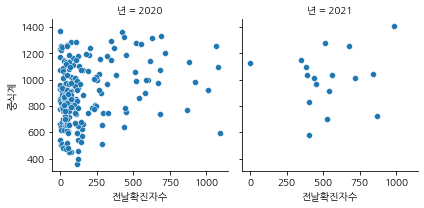

<<<<<<< 년 >>>>>>>
=============전날확진자수별 석식계==============


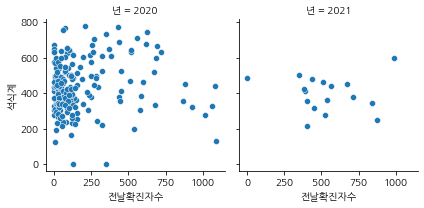

<<<<<<< 월 >>>>>>>
=============전날확진자수별 중식계==============


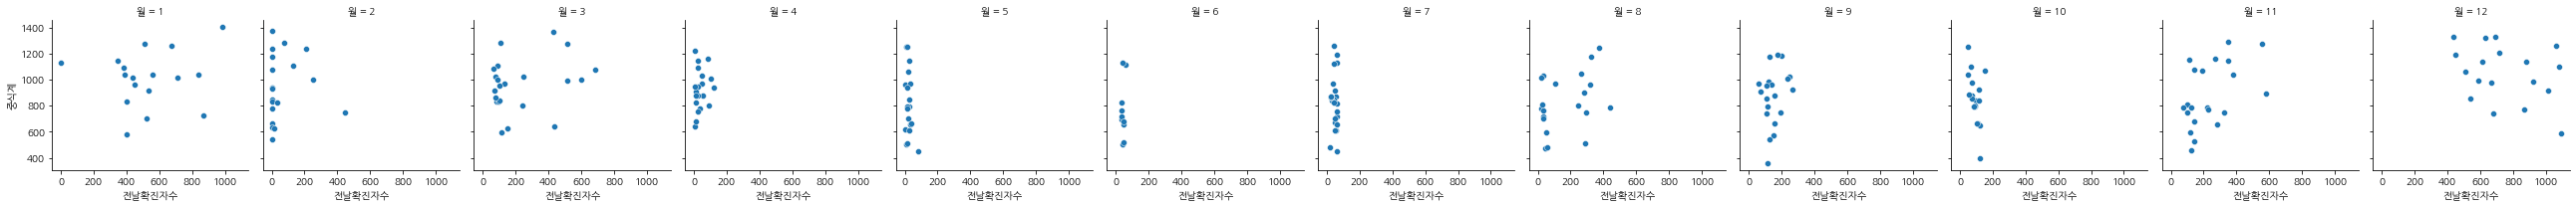

<<<<<<< 월 >>>>>>>
=============전날확진자수별 석식계==============


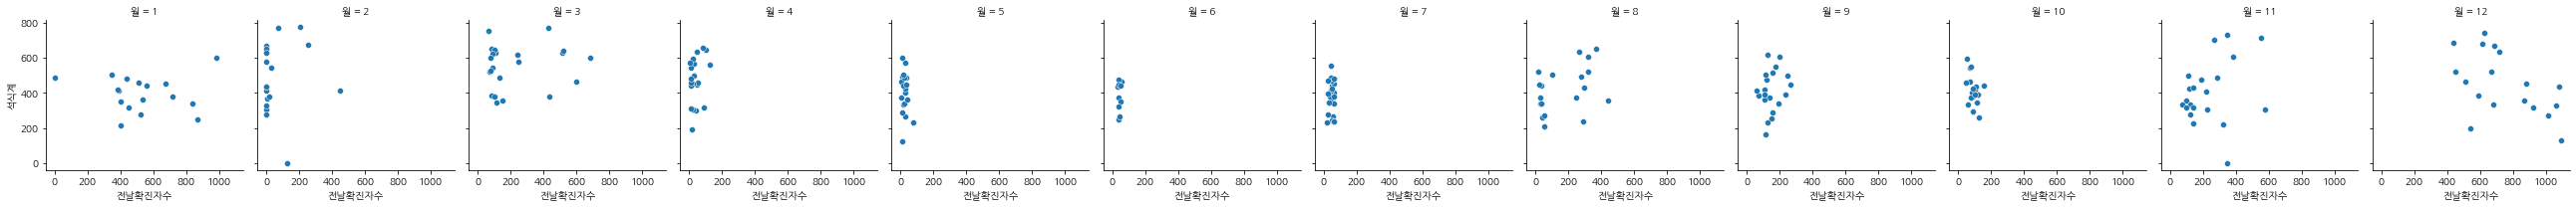

In [386]:
for i in ['년', '월']:
    for pop in ['중식계', '석식계']:
        print(f'<<<<<<< {i} >>>>>>>')
        print(f'=============전날확진자수별 {pop}==============')
        grid = sns.FacetGrid(data=corona, col=i)
        grid.map(sns.scatterplot, '전날확진자수', pop)
        plt.show()

<<<<<<< 년 >>>>>>>
=============전날확진자수별 재택근무자수==============


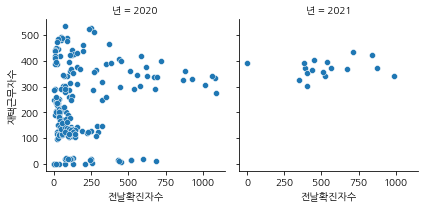

<<<<<<< 월 >>>>>>>
=============전날확진자수별 재택근무자수==============


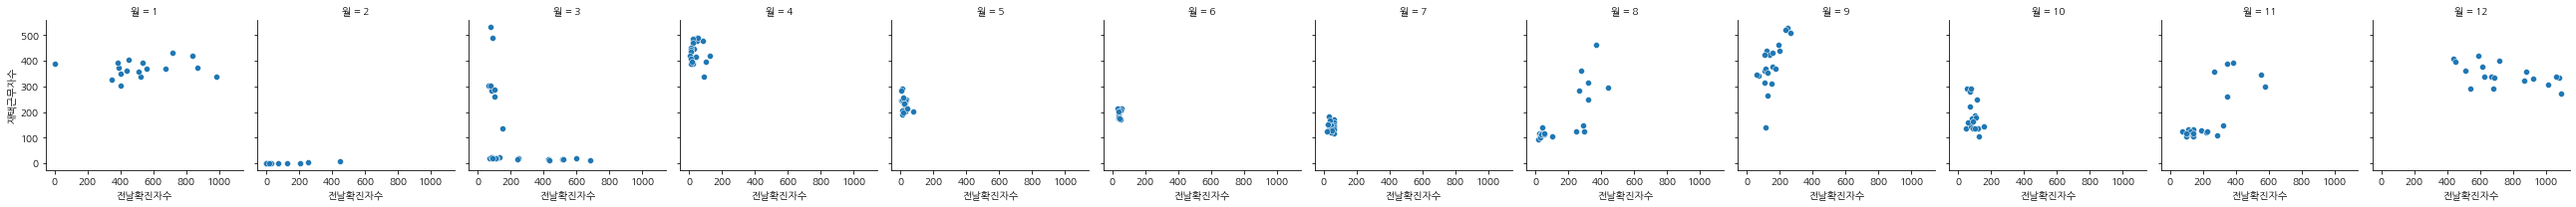

In [389]:
for i in ['년', '월']:
    for pop in ['재택근무자수']:
        print(f'<<<<<<< {i} >>>>>>>')
        print(f'=============전날확진자수별 {pop}==============')
        grid = sns.FacetGrid(data=corona, col=i)
        grid.map(sns.scatterplot, '전날확진자수', pop)
        plt.show()

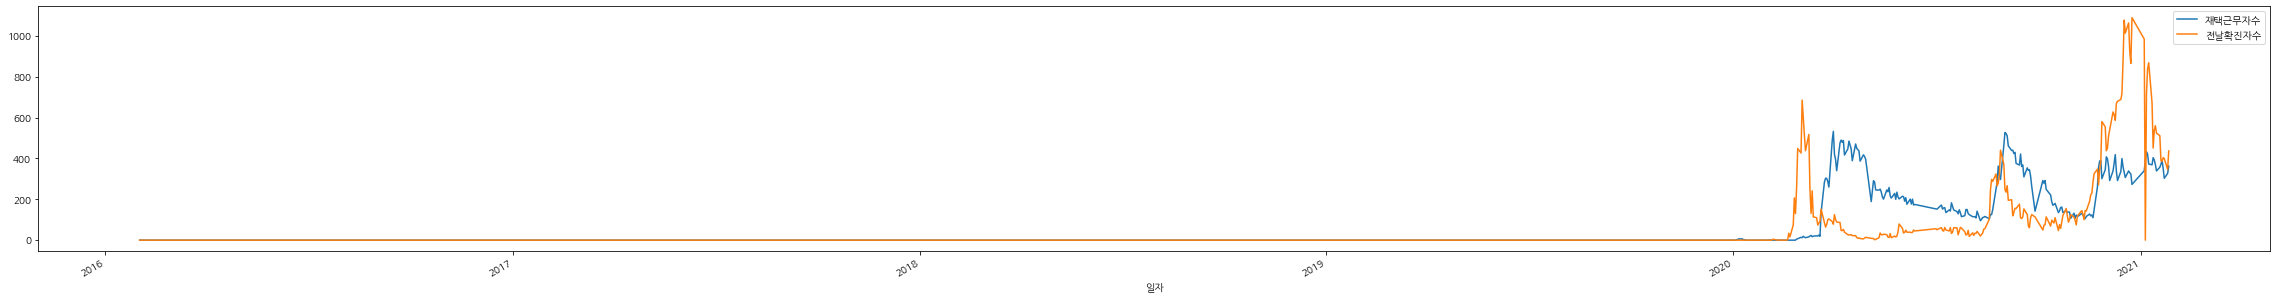

In [396]:
train.plot(x = '일자', y = ['재택근무자수','전날확진자수'], figsize = (40, 5))
plt.show()